In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_train= pd.read_excel('Data_Train.xlsx')

In [3]:
data_train.head(7)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
5,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873
6,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087


In [4]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [5]:
data_train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [6]:
data_train.dropna(inplace=True)

In [7]:
data=data_train.copy()

In [8]:
data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [9]:
def change_to_datetime(col):
    data[col]= pd.to_datetime(data[col])

In [10]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [11]:
for feature in ['Date_of_Journey', 'Dep_Time', 'Arrival_Time']:
    change_to_datetime(feature)

/Users/ayushphukan/opt/anaconda3/lib/python3.9/site-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '24/03/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/Users/ayushphukan/opt/anaconda3/lib/python3.9/site-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '24/06/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/Users/ayushphukan/opt/anaconda3/lib/python3.9/site-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '27/05/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/Users/ayushphukan/opt/anaconda3/lib/python3.9/site-packages/pandas/core/tools/datetimes.py:1047: UserWarn

In [12]:
data.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [13]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2023-02-26 22:20:00,2023-03-22 01:10:00,2h 50m,non-stop,No info,3897
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-02-26 05:50:00,2023-02-26 13:15:00,7h 25m,2 stops,No info,7662
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2023-02-26 09:25:00,2023-06-10 04:25:00,19h,2 stops,No info,13882
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2023-02-26 18:05:00,2023-02-26 23:30:00,5h 25m,1 stop,No info,6218
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2023-02-26 16:50:00,2023-02-26 21:35:00,4h 45m,1 stop,No info,13302


In [14]:
data['Date_of_Journey'].min()

Timestamp('2019-01-03 00:00:00')

In [15]:
data['Date_of_Journey'].max()

Timestamp('2019-12-06 00:00:00')

In [16]:
data['Journey_day']= data["Date_of_Journey"].dt.day

In [17]:
data['Journey_month']= data["Date_of_Journey"].dt.month

In [18]:
data['Journey_year']= data["Date_of_Journey"].dt.year

In [19]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2023-02-26 22:20:00,2023-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-02-26 05:50:00,2023-02-26 13:15:00,7h 25m,2 stops,No info,7662,5,1,2019
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2023-02-26 09:25:00,2023-06-10 04:25:00,19h,2 stops,No info,13882,6,9,2019
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2023-02-26 18:05:00,2023-02-26 23:30:00,5h 25m,1 stop,No info,6218,5,12,2019
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2023-02-26 16:50:00,2023-02-26 21:35:00,4h 45m,1 stop,No info,13302,3,1,2019


In [20]:
data.drop('Date_of_Journey', axis=1, inplace=True)

In [21]:
def extract_hour_min(df,col):
    df[col+ " hour"]= df[col].dt.hour
    df[col+ " min"]= df[col].dt.minute
    df.drop(col, axis=1, inplace=True)
    return df.head(2)

In [22]:
extract_hour_min(data,'Dep_Time')

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time hour,Dep_Time min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2023-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-02-26 13:15:00,7h 25m,2 stops,No info,7662,5,1,2019,5,50


In [23]:
extract_hour_min(data,'Arrival_Time')

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time hour,Dep_Time min,Arrival_Time hour,Arrival_Time min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15


In [24]:
def flight_dep_time(x):
    if (x>4) and (x<=8):
        return "Early Morning"
    elif (x>8) and (x<=12):
        return "Morning"
    elif (x>12) and (x<=16):
        return "Afternoon"
    elif (x>16) and (x<=20):
        return "Evening"
    elif (x>20) and (x<=24):
        return "Night"
    else:
        return "Late Night"

<AxesSubplot:>

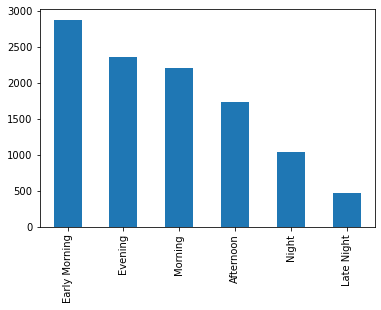

In [25]:
data["Dep_Time hour"].apply(flight_dep_time).value_counts().plot(kind='bar')
    

<AxesSubplot:ylabel='Dep_Time hour'>

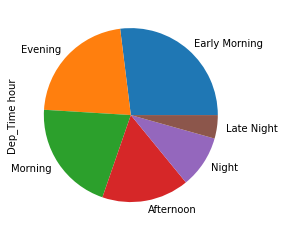

In [26]:
data["Dep_Time hour"].apply(flight_dep_time).value_counts().plot(kind='pie')

### Pre-processing 'Duration'

In [27]:
data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time hour,Dep_Time min,Arrival_Time hour,Arrival_Time min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,2019,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,2019,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,2019,16,50,21,35


In [28]:
def pre_processing_duration(x):
    if "h" not in x:
        x= "0h "+x
    if "m" not in x:
        x= x+ " 0m"
    return x

In [29]:
data["Duration"]= data["Duration"].apply(pre_processing_duration)

In [30]:
data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time hour,Dep_Time min,Arrival_Time hour,Arrival_Time min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,2019,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,2019,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,2019,16,50,21,35


In [31]:
data["Duration_hours"]= data["Duration"].apply(lambda x:int(x.split(" ")[0][0:-1]))

In [32]:
data["Duration_min"]= data["Duration"].apply(lambda x:int(x.split(" ")[1][0:-1]))

In [33]:
data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time hour,Dep_Time min,Arrival_Time hour,Arrival_Time min,Duration_hours,Duration_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,2019,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,2019,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,2019,16,50,21,35,4,45


In [34]:
data.drop("Duration", axis=1, inplace=True)

In [35]:
data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time hour,Dep_Time min,Arrival_Time hour,Arrival_Time min,Duration_hours,Duration_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,2019,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,6,9,2019,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,5,12,2019,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,3,1,2019,16,50,21,35,4,45


In [36]:
data[data["Total_Stops"]=="non-stop"]

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time hour,Dep_Time min,Arrival_Time hour,Arrival_Time min,Duration_hours,Duration_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50
5,SpiceJet,Kolkata,Banglore,CCU → BLR,non-stop,No info,3873,24,6,2019,9,0,11,25,2,25
11,IndiGo,Kolkata,Banglore,CCU → BLR,non-stop,No info,4174,18,4,2019,20,20,22,55,2,35
12,Air India,Chennai,Kolkata,MAA → CCU,non-stop,No info,4667,24,6,2019,11,40,13,55,2,15
14,IndiGo,Kolkata,Banglore,CCU → BLR,non-stop,No info,4804,24,4,2019,17,15,19,50,2,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10677,SpiceJet,Banglore,Delhi,BLR → DEL,non-stop,No check-in baggage included,3257,21,5,2019,5,55,8,35,2,40
10678,Air Asia,Kolkata,Banglore,CCU → BLR,non-stop,No info,4107,4,9,2019,19,55,22,25,2,30
10679,Air India,Kolkata,Banglore,CCU → BLR,non-stop,No info,4145,27,4,2019,20,45,23,20,2,35
10680,Jet Airways,Banglore,Delhi,BLR → DEL,non-stop,No info,7229,27,4,2019,8,20,11,20,3,0


In [37]:
data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time hour,Dep_Time min,Arrival_Time hour,Arrival_Time min,Duration_hours,Duration_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,2019,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,6,9,2019,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,5,12,2019,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,3,1,2019,16,50,21,35,4,45


In [38]:
data["Total_Duration_mins"]= data['Duration_hours']*60+ data["Duration_min"]

In [39]:
data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time hour,Dep_Time min,Arrival_Time hour,Arrival_Time min,Duration_hours,Duration_min,Total_Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,2019,5,50,13,15,7,25,445
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,6,9,2019,9,25,4,25,19,0,1140
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,5,12,2019,18,5,23,30,5,25,325
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,3,1,2019,16,50,21,35,4,45,285


## Does Duration minutes affect Price?

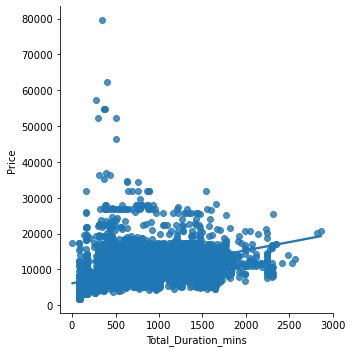

In [40]:
sns.lmplot(x="Total_Duration_mins", y= "Price", data= data)

In [41]:
#data.drop(["Duration_hours", "Duration_min"], axis= 1, inplace=True)

## Frequent Destination city 

In [42]:
data["Destination"].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

<AxesSubplot:>

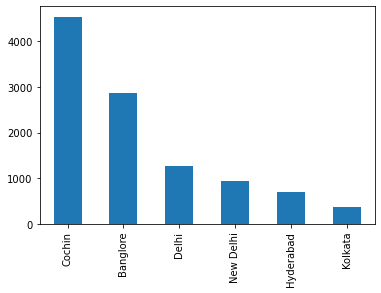

In [43]:
data["Destination"].value_counts().plot(kind="bar")

## Most used route by Jet Airways

In [44]:
jet_airways=data[data["Airline"]=="Jet Airways"]

<AxesSubplot:>

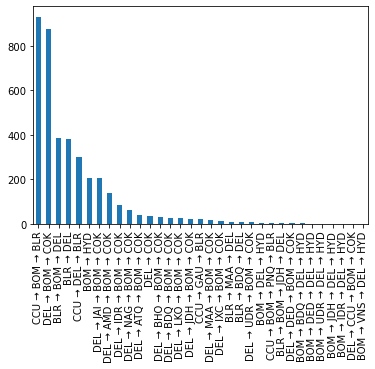

In [45]:
jet_airways["Route"].value_counts().plot(kind="bar")

In [46]:
data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time hour,Dep_Time min,Arrival_Time hour,Arrival_Time min,Duration_hours,Duration_min,Total_Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,2019,5,50,13,15,7,25,445
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,6,9,2019,9,25,4,25,19,0,1140
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,5,12,2019,18,5,23,30,5,25,325
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,3,1,2019,16,50,21,35,4,45,285


## Airline vs Price Analysis

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'IndiGo'),
  Text(1, 0, 'Air India'),
  Text(2, 0, 'Jet Airways'),
  Text(3, 0, 'SpiceJet'),
  Text(4, 0, 'Multiple carriers'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'Air Asia'),
  Text(8, 0, 'Vistara Premium economy'),
  Text(9, 0, 'Jet Airways Business'),
  Text(10, 0, 'Multiple carriers Premium economy'),
  Text(11, 0, 'Trujet')])

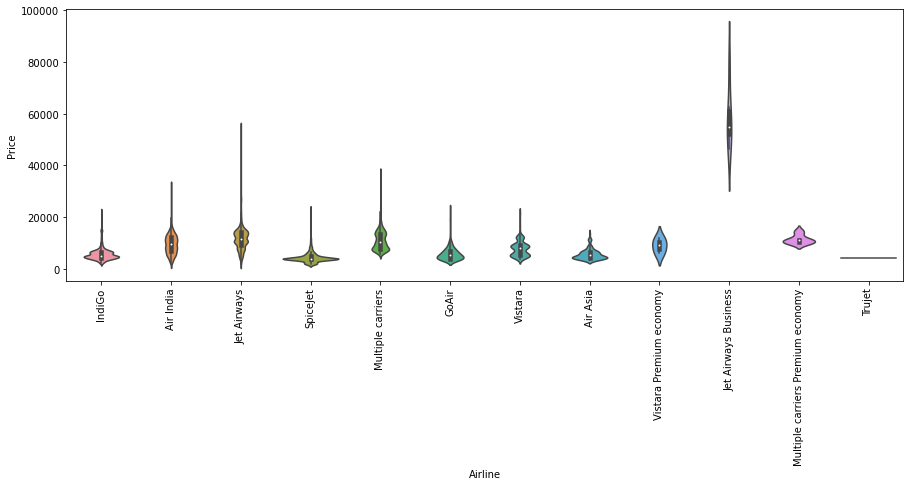

In [47]:
plt.figure(figsize=(15,5))
sns.violinplot(y='Price',x='Airline',data=data)
plt.xticks(rotation='vertical')

## Removing Unnecessary columns

In [48]:
np.round(data["Additional_Info"].value_counts()/len(data)*100, 2)

No info                         78.11
In-flight meal not included     18.55
No check-in baggage included     3.00
1 Long layover                   0.18
Change airports                  0.07
Business class                   0.04
No Info                          0.03
1 Short layover                  0.01
Red-eye flight                   0.01
2 Long layover                   0.01
Name: Additional_Info, dtype: float64

In [49]:
data.drop(["Additional_Info", "Route", "Journey_year", "Total_Duration_mins"], axis=1, inplace=True)

In [50]:
data.head(2)

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_Time hour,Dep_Time min,Arrival_Time hour,Arrival_Time min,Duration_hours,Duration_min
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,7662,5,1,5,50,13,15,7,25


In [51]:
data["Source"].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [52]:
#def one_hot_encoder(col):
 #   for x in data[col]:
  #      data[col +" _" + x]=1

In [53]:
for category in data["Source"].unique():
    data["Source_"+ category]= data["Source"].apply(lambda x: 1 if x==category else 0)

In [54]:
data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_Time hour,Dep_Time min,Arrival_Time hour,Arrival_Time min,Duration_hours,Duration_min,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,22,20,1,10,2,50,1,0,0,0,0
1,Air India,Kolkata,Banglore,2 stops,7662,5,1,5,50,13,15,7,25,0,1,0,0,0
2,Jet Airways,Delhi,Cochin,2 stops,13882,6,9,9,25,4,25,19,0,0,0,1,0,0
3,IndiGo,Kolkata,Banglore,1 stop,6218,5,12,18,5,23,30,5,25,0,1,0,0,0
4,IndiGo,Banglore,New Delhi,1 stop,13302,3,1,16,50,21,35,4,45,1,0,0,0,0


In [55]:
[col for col in data.columns if data[col].dtype=="object"]

['Airline', 'Source', 'Destination', 'Total_Stops']

In [56]:
data["Destination"].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [57]:
data["Destination"].replace("New Delhi", "Delhi", inplace= True)

In [58]:
data["Destination"].unique()

array(['Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Hyderabad'],
      dtype=object)

In [59]:
data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_Time hour,Dep_Time min,Arrival_Time hour,Arrival_Time min,Duration_hours,Duration_min,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,IndiGo,Banglore,Delhi,non-stop,3897,24,3,22,20,1,10,2,50,1,0,0,0,0
1,Air India,Kolkata,Banglore,2 stops,7662,5,1,5,50,13,15,7,25,0,1,0,0,0
2,Jet Airways,Delhi,Cochin,2 stops,13882,6,9,9,25,4,25,19,0,0,0,1,0,0
3,IndiGo,Kolkata,Banglore,1 stop,6218,5,12,18,5,23,30,5,25,0,1,0,0,0
4,IndiGo,Banglore,Delhi,1 stop,13302,3,1,16,50,21,35,4,45,1,0,0,0,0


In [60]:
airlines=data.groupby("Airline")["Price"].mean().sort_values().index

In [61]:
airlines

Index(['Trujet', 'SpiceJet', 'Air Asia', 'IndiGo', 'GoAir', 'Vistara',
       'Vistara Premium economy', 'Air India', 'Multiple carriers',
       'Multiple carriers Premium economy', 'Jet Airways',
       'Jet Airways Business'],
      dtype='object', name='Airline')

In [62]:
dict1={key:index for index,key in enumerate(airlines, 0)}

In [63]:
dict1

{'Trujet': 0,
 'SpiceJet': 1,
 'Air Asia': 2,
 'IndiGo': 3,
 'GoAir': 4,
 'Vistara': 5,
 'Vistara Premium economy': 6,
 'Air India': 7,
 'Multiple carriers': 8,
 'Multiple carriers Premium economy': 9,
 'Jet Airways': 10,
 'Jet Airways Business': 11}

In [64]:
data["Airline"]= data["Airline"].map(dict1)

In [65]:
data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_Time hour,Dep_Time min,Arrival_Time hour,Arrival_Time min,Duration_hours,Duration_min,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,Banglore,Delhi,non-stop,3897,24,3,22,20,1,10,2,50,1,0,0,0,0
1,7,Kolkata,Banglore,2 stops,7662,5,1,5,50,13,15,7,25,0,1,0,0,0
2,10,Delhi,Cochin,2 stops,13882,6,9,9,25,4,25,19,0,0,0,1,0,0
3,3,Kolkata,Banglore,1 stop,6218,5,12,18,5,23,30,5,25,0,1,0,0,0
4,3,Banglore,Delhi,1 stop,13302,3,1,16,50,21,35,4,45,1,0,0,0,0


In [66]:
destinations=data.groupby("Destination")["Price"].mean().sort_values().index

In [67]:
destinations

Index(['Kolkata', 'Hyderabad', 'Delhi', 'Banglore', 'Cochin'], dtype='object', name='Destination')

In [68]:
dict2= {key:index for index,key in enumerate(destinations,0)}

In [69]:
dict2

{'Kolkata': 0, 'Hyderabad': 1, 'Delhi': 2, 'Banglore': 3, 'Cochin': 4}

In [70]:
data["Destination"]=data["Destination"].map(dict2)

In [71]:
data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_Time hour,Dep_Time min,Arrival_Time hour,Arrival_Time min,Duration_hours,Duration_min,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,Banglore,2,non-stop,3897,24,3,22,20,1,10,2,50,1,0,0,0,0
1,7,Kolkata,3,2 stops,7662,5,1,5,50,13,15,7,25,0,1,0,0,0
2,10,Delhi,4,2 stops,13882,6,9,9,25,4,25,19,0,0,0,1,0,0
3,3,Kolkata,3,1 stop,6218,5,12,18,5,23,30,5,25,0,1,0,0,0
4,3,Banglore,2,1 stop,13302,3,1,16,50,21,35,4,45,1,0,0,0,0


In [72]:
data["Total_Stops"].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [73]:
stops= {'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}

In [74]:
data["Total_Stops"]=data["Total_Stops"].map(stops)

In [75]:
data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_Time hour,Dep_Time min,Arrival_Time hour,Arrival_Time min,Duration_hours,Duration_min,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,Banglore,2,0,3897,24,3,22,20,1,10,2,50,1,0,0,0,0
1,7,Kolkata,3,2,7662,5,1,5,50,13,15,7,25,0,1,0,0,0
2,10,Delhi,4,2,13882,6,9,9,25,4,25,19,0,0,0,1,0,0
3,3,Kolkata,3,1,6218,5,12,18,5,23,30,5,25,0,1,0,0,0
4,3,Banglore,2,1,13302,3,1,16,50,21,35,4,45,1,0,0,0,0


In [76]:
def plot(df, col):
    fig,(ax1, ax2, ax3)= plt.subplots(3,1)
    sns.distplot(df[col],ax=ax1)
    sns.boxplot(df[col], ax=ax2)
    sns.distplot(df[col], ax=ax3, kde=False)

/Users/ayushphukan/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/ayushphukan/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/ayushphukan/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `

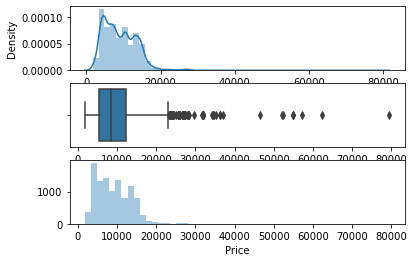

In [77]:
 plot(data,"Price")

In [78]:
data["Price"]=np.where(data["Price"]>=30000, data["Price"].median(), data["Price"])

/Users/ayushphukan/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/ayushphukan/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


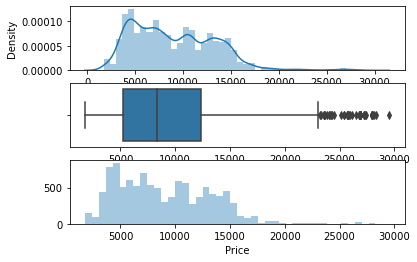

In [79]:
plot(data,"Price")

In [80]:
data.drop("Source", axis=1, inplace=True)

In [81]:
from sklearn.feature_selection import mutual_info_regression

In [82]:
X=data.drop("Price", axis=1)

In [83]:
y=data["Price"]

In [84]:
y

0         3897.0
1         7662.0
2        13882.0
3         6218.0
4        13302.0
          ...   
10678     4107.0
10679     4145.0
10680     7229.0
10681    12648.0
10682    11753.0
Name: Price, Length: 10682, dtype: float64

In [85]:
X.dtypes

Airline              int64
Destination          int64
Total_Stops          int64
Journey_day          int64
Journey_month        int64
Dep_Time hour        int64
Dep_Time min         int64
Arrival_Time hour    int64
Arrival_Time min     int64
Duration_hours       int64
Duration_min         int64
Source_Banglore      int64
Source_Kolkata       int64
Source_Delhi         int64
Source_Chennai       int64
Source_Mumbai        int64
dtype: object

In [86]:
mutual_info_regression(X,y)

array([0.97606831, 0.99823843, 0.79543027, 0.20474069, 0.231816  ,
       0.32637363, 0.26210174, 0.39742572, 0.34895842, 0.4706686 ,
       0.33519627, 0.38019072, 0.45390309, 0.52329987, 0.130229  ,
       0.19973916])

In [87]:
scores= pd.DataFrame(mutual_info_regression(X,y),index=X.columns)
scores.columns=["Importance"]

In [88]:
scores.sort_values(by="Importance", ascending=False)

,Importance
Destination,1.001072
Airline,0.968944
Total_Stops,0.781760
Source_Delhi,0.513401
Duration_hours,0.470448
Source_Kolkata,0.462692
Arrival_Time hour,0.398871
Source_Banglore,0.388080
Duration_min,0.350759
Dep_Time hour,0.346092


In [89]:
from sklearn.model_selection import train_test_split

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [91]:
from sklearn.ensemble import RandomForestRegressor

In [92]:
ml_model= RandomForestRegressor()

In [93]:
model= ml_model.fit(X_train, y_train)

In [94]:
y_pred=model.predict(X_test)

In [95]:
y_pred

array([16713.3 ,  6365.36,  8834.86, ...,  3469.46,  6126.33,  7122.3 ])

In [96]:
import pickle

In [97]:
file=open(r"rf.random.pkl", "wb")

In [98]:
pickle.dump(model, file)

In [99]:
model= open(r"rf.random.pkl", "rb")

In [100]:
forest=pickle.load(model)

In [101]:
forest.predict(X_test)

array([16713.3 ,  6365.36,  8834.86, ...,  3469.46,  6126.33,  7122.3 ])

In [102]:
def mape(y_true, y_pred):
    y_true, y_pred= np.array(y_true), np.array(y_pred)
    
    return np.mean(np.abs((y_true-y_pred)/y_true))*100
 

In [103]:
mape(y_test, y_pred)

13.304585768279336

# Automating ML Pipleline

In [104]:
def predict(ml_model):
    
    model= ml_model.fit(X_train, y_train)
    print("Training Score: {}".format(model.score(X_train, y_train)))
    y_prediction= model.predict(X_test)
    print("Prediction: {}".format(y_prediction))
    print("\n")
    
    from sklearn import metrics
    
    print("r2_score: ",metrics.r2_score(y_test, y_prediction))
    print("MSE: ",metrics.mean_squared_error(y_test, y_prediction))
    print("RMSE: ",np.sqrt(metrics.mean_squared_error(y_test, y_prediction)))
    print("MAE: ",metrics.mean_absolute_error(y_test, y_prediction))
    print("MAPE: {}".format(mape(y_test, y_prediction)))
    sns.distplot(y_test-y_prediction)
    

Training Score: 0.9508673487637066
Prediction: [16750.33  6563.52  8817.46 ...  3540.24  6292.64  7120.44]


r2_score:  0.810712528324498
MSE:  3529116.54095051
RMSE:  1878.5942991903573
MAE:  1182.2608271177842
MAPE: 13.314765733685807


/Users/ayushphukan/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


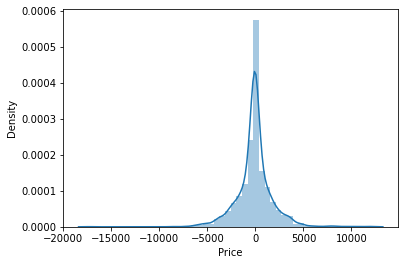

In [105]:
predict(RandomForestRegressor())

# Hypertuning

In [106]:
from sklearn.model_selection import RandomizedSearchCV

In [107]:
reg_rf= RandomForestRegressor()

In [108]:
np.linspace(start=1000,stop=1200,num=6)

array([1000., 1040., 1080., 1120., 1160., 1200.])

In [109]:
# Number of trees in random forest
n_estimators=[int(x) for x in np.linspace(start=1000,stop=1200,num=6)]

# Number of features to consider at every split
max_features=["auto", "sqrt"]

# Maximum number of levels in tree
max_depth=[int(x) for x in np.linspace(start=5,stop=30,num=4)]

# Minimum number of samples required to split a node
min_samples_split=[5,10,15,100]

In [110]:
random_grid={
    'n_estimators':n_estimators,
    'max_features':max_features,
    'max_depth':max_depth,
    'min_samples_split':min_samples_split
    
}

In [111]:
random_grid

{'n_estimators': [1000, 1040, 1080, 1120, 1160, 1200],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [5, 13, 21, 30],
 'min_samples_split': [5, 10, 15, 100]}

In [112]:
rf_Random=RandomizedSearchCV(reg_rf,param_distributions=random_grid,cv=3,verbose=2,n_jobs=-1)

In [113]:
rf_Random.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 13, 21, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_split': [5, 10, 15, 100],
                                        'n_estimators': [1000, 1040, 1080, 1120,
                                                         1160, 1200]},
                   verbose=2)

In [114]:
rf_Random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 5,
 'max_features': 'auto',
 'max_depth': 13}

In [115]:
pred2=rf_Random.predict(X_test)

In [116]:
from sklearn import metrics
metrics.r2_score(y_test,pred2)

0.8316056208628351

[CV] END max_depth=5, max_features=auto, min_samples_split=5, n_estimators=1040; total time=   5.5s
[CV] END max_depth=5, max_features=auto, min_samples_split=15, n_estimators=1080; total time=   5.6s
[CV] END max_depth=21, max_features=auto, min_samples_split=10, n_estimators=1000; total time=  11.3s
[CV] END max_depth=5, max_features=auto, min_samples_split=100, n_estimators=1200; total time=   6.1s
[CV] END max_depth=5, max_features=auto, min_samples_split=5, n_estimators=1200; total time=   6.4s
[CV] END max_depth=21, max_features=auto, min_samples_split=10, n_estimators=1000; total time=  11.3s
[CV] END max_depth=13, max_features=auto, min_samples_split=5, n_estimators=1000; total time=  10.9s
[CV] END max_depth=5, max_features=auto, min_samples_split=5, n_estimators=1040; total time=   5.6s
[CV] END max_depth=5, max_features=auto, min_samples_split=15, n_estimators=1080; total time=   5.6s
[CV] END max_depth=21, max_features=auto, min_samples_split=10, n_estimators=1000; total ti